## 4.3 앙상블 학습 개요
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법.   
- 이미지, 영상. 음성, 자연어 등 비정형 데이터의 분류는 딥러닝 모델이 뛰어난 성적을 얻고 있지만, 대부분의 정형 데이터 분류에는 앙상블 모델이 뛰어난 성능을 나태내고 있다. 앙상블 모델은 대표적으로 랜덤 포레스트, 그레디언트 부스팅(GBM) 등이 있으며, 사용하기 쉬울 뿐만 아니라 성능 역시 뛰어남.
- 다양한 앙상블 모델이 있다.

### 앙상블의 유형
1. Voting

2. Bagging - Random Forest

3. Boosting - AdaBoost, Gradient Boost, XGBoost(eXtra Gradient Boost), LightGBM(Light Gradient Boost)   

> __※ Voting vs Bagging__   
 Voting과 Bagging은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.    
※ 차이점   
Voting은 서로 다른 알고리즘을 가진 분류기가 같은 데이터셋을 기반으로 학습하고, 결합.   
Bagging은 같은 알고리즘 유형의 모델들이 이지만 데이터 샘플링을 다르게 하여 학습 데이터셋이 각각 다르다(단 교차 검증과 다르게 데이터 세트간 중첩을 허용)   

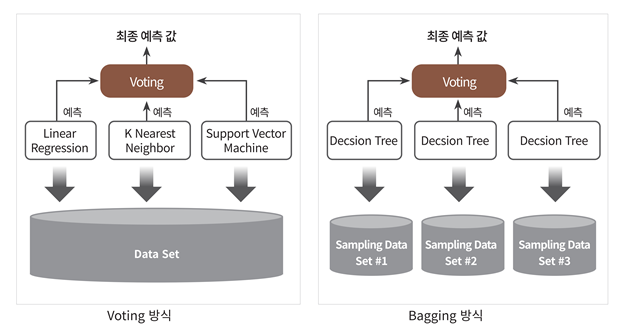

#### Voting   
Hard voting: 다수의 분류모델의 예측 결과값을 다수결로 최종 class를 결정.     
Soft voting: 다수의 분류모델의 예측 결과값간 확률을 평균하여 최종 class를 결정. 
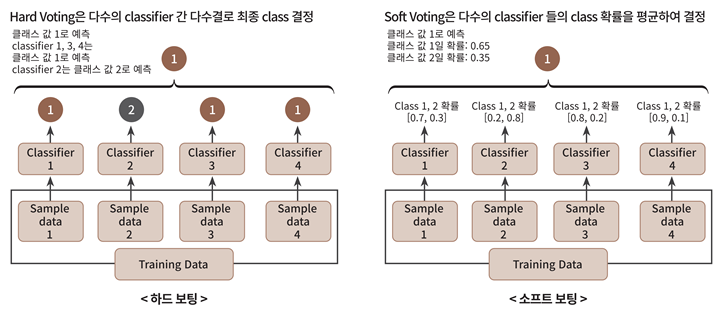

### Voting Classifier

**위스콘신 유방암 데이터 로드**

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier  # 앙상블 알고리즘

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**VotingClassifier로 개별모델은 로지스틱 회귀와 KNN을 보팅방식으로 결합하고 성능 비교**

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
# max_iter는 Gradient Descent 방식을 반복해서 몇번 수행할 것인가
lr_clf = LogisticRegression(max_iter=3000)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474


In [ ]:
# 개별 모델의 학습/예측/평가.
for classifier in [lr_clf, knn_clf]:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


## Bagging
- Bagging: 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.   

## 4.4 Random Forest

- 배깅의 대표적인 알고리즘은 랜덤 포레스트이다.
- 사이킷런의 랜덤 포레스트는 100개의 의사결정나무 모델을 사용.   
- 랜덤 포레스트는 여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 하고, 최종적으로 모든 모델이 보팅을 통해 예측 결정을 한다.

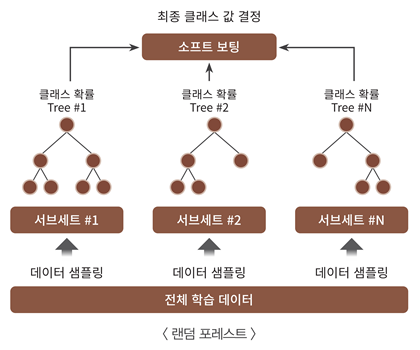

- 랜덤 포레스트는 개별적인 분류기 기반 알고리즘은 결정트리지만, 개별 트리가 학습하는 데이터 셋은 전체 데이터 셋에서 일부가 중첩되게 샘플링된 데이터이다.
- 여러개의 데이터 셋을 중첩되게 분리하는 것을 부트스트래핑(Bootstrapping) 분할 방식이라 한다.    
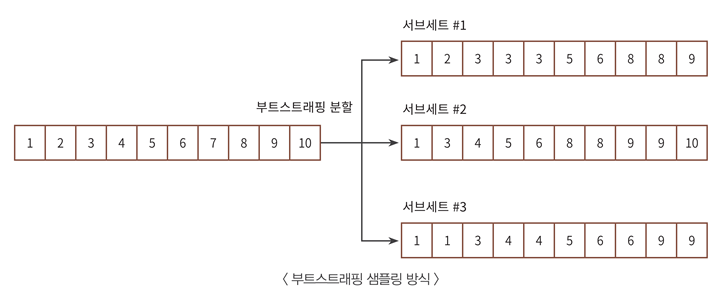

**학습/테스트 데이터로 분리하고 랜덤 포레스트로 학습/예측/평가**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9561


In [ ]:
X_test[10],y_test[10]

(array([1.268e+01, 2.384e+01, 8.269e+01, 4.990e+02, 1.122e-01, 1.262e-01,
        1.128e-01, 6.873e-02, 1.905e-01, 6.590e-02, 4.255e-01, 1.178e+00,
        2.927e+00, 3.646e+01, 7.781e-03, 2.648e-02, 2.973e-02, 1.290e-02,
        1.635e-02, 3.601e-03, 1.709e+01, 3.347e+01, 1.118e+02, 8.883e+02,
        1.851e-01, 4.061e-01, 4.024e-01, 1.716e-01, 3.383e-01, 1.031e-01]), 0)

In [ ]:
rf_clf.predict([X_test[100]]), y_test[100]

(array([0]), 0)

**GridSearchCV 로 교차검증 및 하이퍼 파라미터 튜닝**   

- n_estimators: 랜덤 포레스트에서 의사결정 트리의 개수 지정 디폴트는 100.
- 나머지 파라미터는 의사결정 나무와 동일

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)  #  n_jobs=-1: 사용가능한 CPU 코어 모두 사용 
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 ) 
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9495


**튜닝된 하이퍼 파라미터로 재 학습 및 예측/평가**

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, 
                                 max_depth=10, 
                                 min_samples_leaf=8, 
                                 min_samples_split=8, 
                                 random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9386


**개별 feature들의 중요도 시각화**

In [ ]:
rf_clf1.feature_importances_

array([0.03665963, 0.01155537, 0.06267119, 0.04751175, 0.00394847,
       0.00802312, 0.06102417, 0.12286491, 0.00117141, 0.00182153,
       0.01489339, 0.00063667, 0.01259151, 0.02916557, 0.00126585,
       0.00169071, 0.00044502, 0.00130008, 0.00069457, 0.00086331,
       0.13084554, 0.01114548, 0.15167319, 0.10960818, 0.00685475,
       0.01024992, 0.02489745, 0.12175264, 0.00788441, 0.00429023])

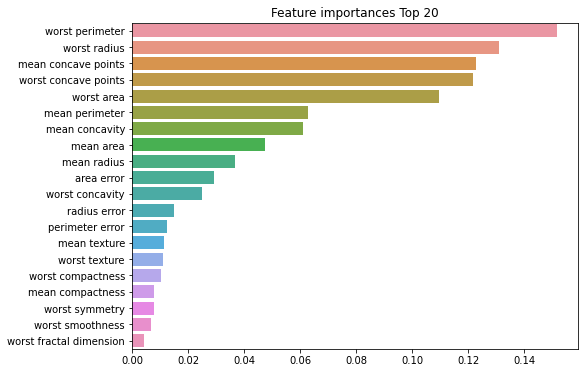

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## Boosting

### AdaBoost

참고자료: https://blog.naver.com/PostView.naver?blogId=gksshdk8003&logNo=220911836024&redirect=Dlog&widgetTypeCall=true&directAccess=false   

여러 개의 약한 학습기(깊이가 얕은 트리)를 순차적으로 학습-예측하면서, 잘못 예측한 데이터에 오차를 보완하는 방식으로 앙상블 하는 방법.

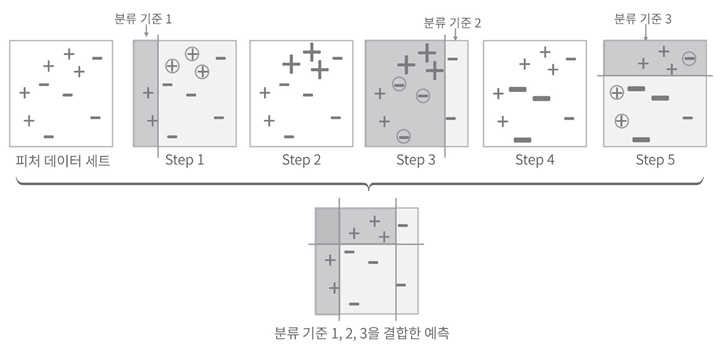    
1. 피처 데이터 셋에서 +와 -를 기준의 왼쪽 오른쪽으로 나누려고 한다   
2. 처음에 왼쪽에 두 +를 잡을 수 있게 분류 기준을 나눔. 그랬더니 오른쪽에 +가 세 개가 빠져나오게 되었다(오류)   
3. 다음 라운드에서 전에 오류였던 +세 개에 가중치를 주어 다시 기준을 나누었더니  +세 개에 +두 개까지 전부 잡아서 기준을 잡음. 그랬더니 -세 개가 +쪽에 왔다(오류)   
4. -세 개에 가중치를 두었더니 다음에는 가로로 나누게 됨    
5. 이제까지 했던 분류 기준들을 결합하여 최종 예측    

->약한 학습기를 순차적으로 학습, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 각 학습기보다 높은 정확도의 예측 결과 도출

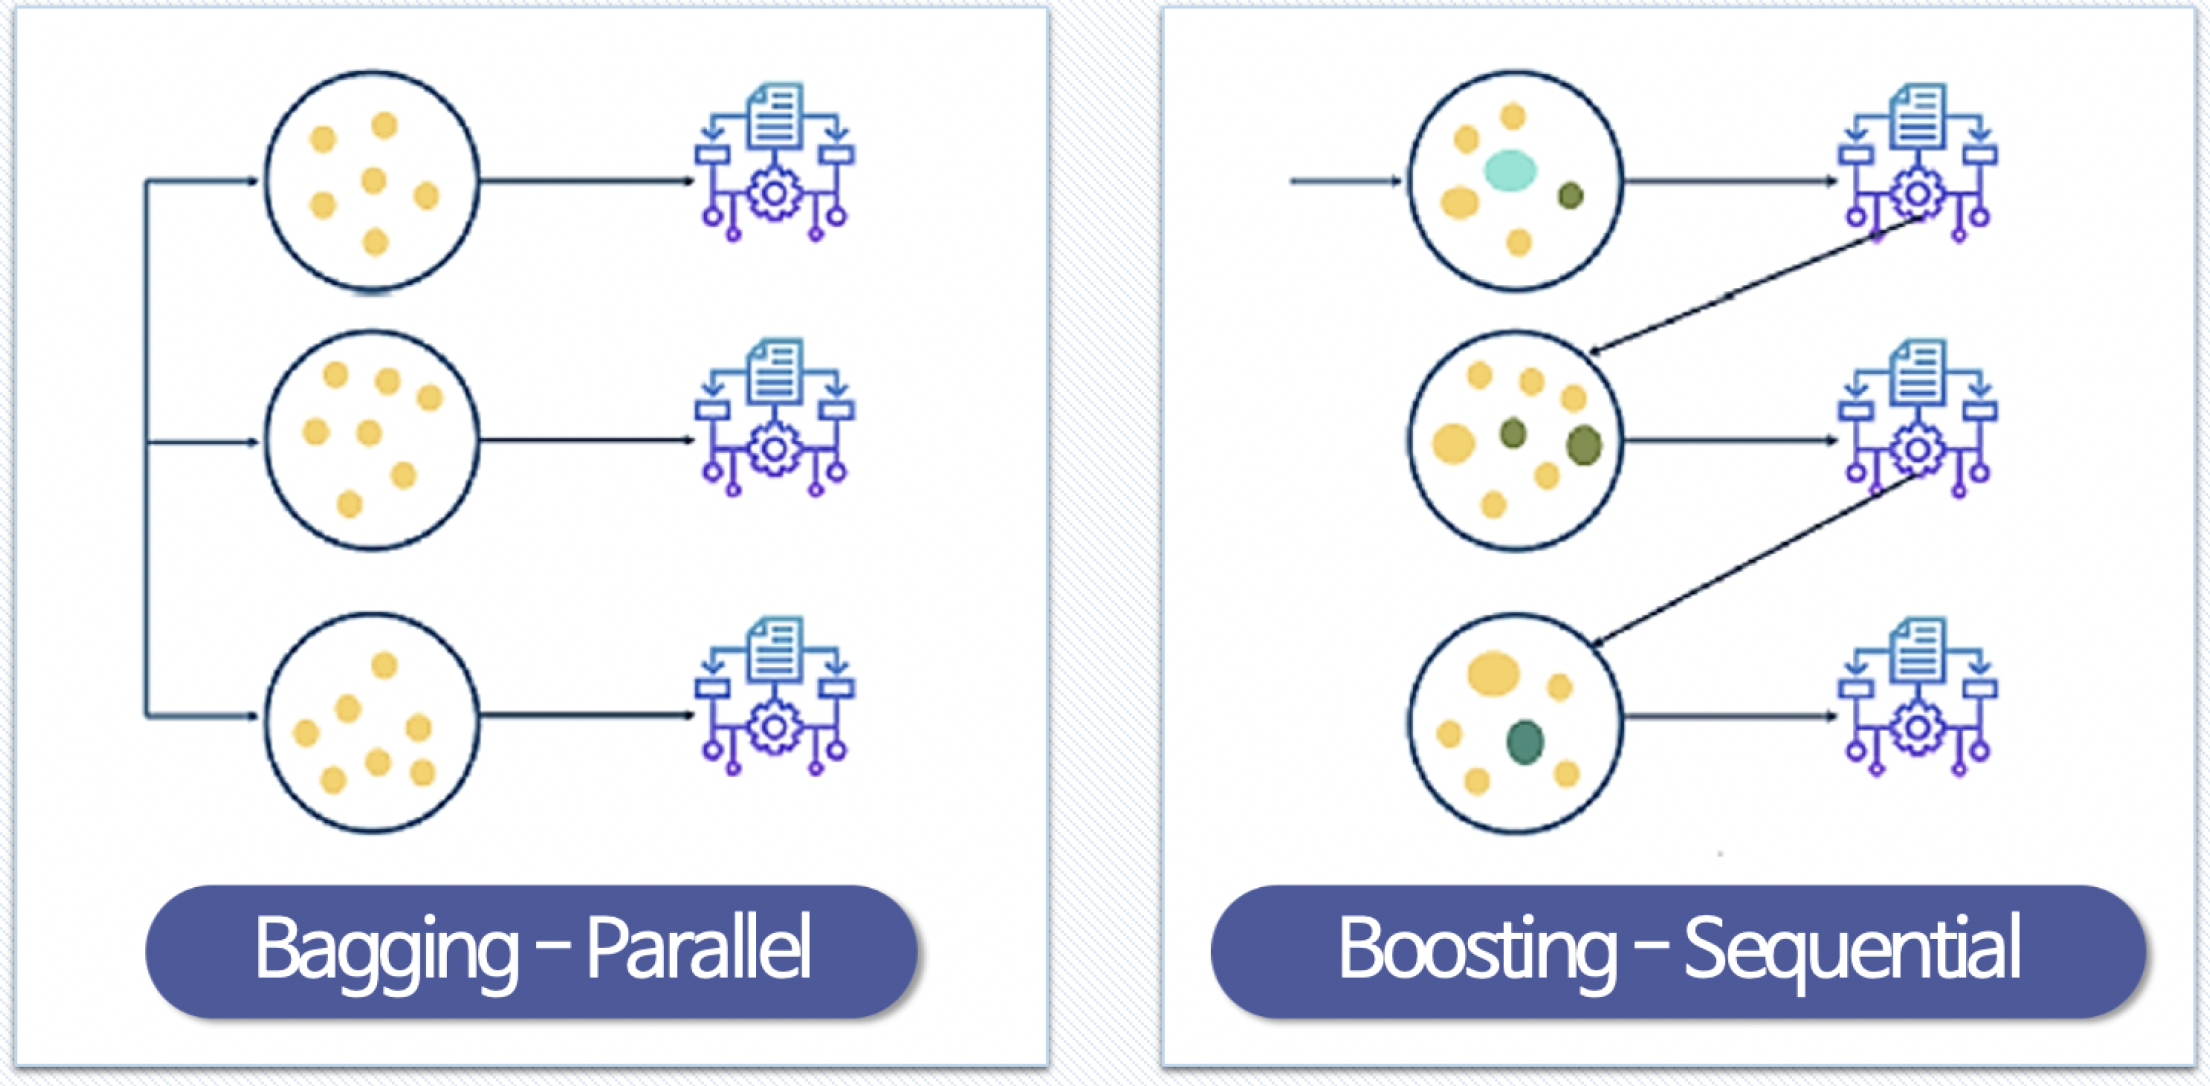

## 4.5 GBM(Gradient Boosting Machine)

In [ ]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9561
GBM 수행 시간: 0.7 초 


###  GBM 하이퍼 파라미터 튜닝
참고자료: https://3months.tistory.com/368    

__모델 파라미터__
- loss : 경사 하강법에서 사용할 비용함수 지정 (디폴트는 deviance)   
- learning_rate : 약한 학습기가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수로 0 ~ 1 값 지정 가능 (디폴트는 0.1)
너무 작은 값 지정 -> 예측 성능은 높아질 수 있지만 수행 시간이 오래 걸릴 수 있고, 반복이 완료되어도 최소오류값을 찾지 못할 수 있음
너무 큰 값 지정 -> 빠른 수행은 가능하지만 최소오류값을 못찾고 지나쳐 예측 성능이 저하될 수 있음
- n_estimators : 약한 학습기의 개수 (디폴트는 100)
개수가 많을수록 예측 성능은 높아질 수 있지만 수행 시간이 오래 걸림
- subsample : 학습에 사용하는 데이터의 샘플링 비율로 0 ~ 1 값 지정 가능 (디폴트는 1, 즉 전체 학습 데이터 기반)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1, 0.5]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9517


In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'learning_rate': 0.05, 'n_estimators': 100}",0.927525,6,0.903509,0.951542
1,"{'learning_rate': 0.05, 'n_estimators': 500}",0.949474,2,0.938596,0.960352
2,"{'learning_rate': 0.1, 'n_estimators': 100}",0.938500,5,0.921053,0.955947
3,"{'learning_rate': 0.1, 'n_estimators': 500}",0.951667,1,0.942982,0.960352
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.947262,3,0.942982,0.951542
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.947262,3,0.942982,0.951542


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 

# gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_pred_cv = grid_cv.best_estimator_ # GridSearchCV의 최적의 튜딩 옵션 적용
gb_pred = gb_pred_cv.predict(X_test)

gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9737


In [ ]:
gb_pred_cv

GradientBoostingClassifier(n_estimators=500, random_state=0)

### 추가 부스팅알고리즘
- xgboost: https://xgboost.readthedocs.io/en/latest/    
- LightGBM: https://lightgbm.readthedocs.io/en/latest/

#### 오버샘플링 기법
- https://wyatt37.tistory.com/10